In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vu-dmt-assigment-2-2023/submission_sample.csv
/kaggle/input/vu-dmt-assigment-2-2023/test_set_VU_DM.csv
/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# load the data
df_original = pd.read_csv('/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv')

In [5]:
# sample 10000 instances of the data
df = df_original.sample(n = 10000)
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
2883786,193679,2013-05-24 21:55:40,24,216,NaN,NaN,216,36641,3,2.5,0,1.79,0.0024,4.67,18,128.19,0,8934,2,50,2,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3321158,222993,2013-06-21 09:47:31,5,219,NaN,NaN,129,17126,2,3.5,1,4.86,0.0979,0.00,34,114.00,0,16076,1,4,2,0,2,0,NaN,4294.82,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0,NaN,0,NaN,0
4127161,276892,2013-04-09 13:09:44,14,100,NaN,NaN,219,5322,4,4.0,1,5.17,NaN,5.88,2,288.27,1,13430,5,6,1,0,1,0,NaN,2265.21,0,NaN,NaN,NaN,0.0,0.0,9.0,0.0,0.0,9.0,NaN,NaN,NaN,0.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,16.0,0,NaN,0
50041,3315,2013-01-14 11:11:25,14,100,NaN,NaN,100,138973,3,3.5,1,4.34,0.1383,4.71,31,128.09,1,17311,1,5,2,0,1,1,NaN,42.95,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,0,NaN,0
1220914,81679,2013-04-06 14:33:31,31,219,NaN,NaN,219,58049,2,3.0,0,2.83,0.0715,4.60,18,76.00,1,26531,1,34,2,0,1,1,NaN,1737.26,0,NaN,NaN,NaN,1.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [6]:
# the shape of the data
print("the shape of the data ",df.shape)
# the name of the columns
print(df.columns)
# data type
# print(df.dtypes)

the shape of the data  (10000, 54)
Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'com

In [7]:
# Check for missing values
df.isnull().sum(axis = 0)

srch_id                           0
date_time                         0
site_id                           0
visitor_location_country_id       0
visitor_hist_starrating        9508
visitor_hist_adr_usd           9505
prop_country_id                   0
prop_id                           0
prop_starrating                   0
prop_review_score                24
prop_brand_bool                   0
prop_location_score1              0
prop_location_score2           2186
prop_log_historical_price         0
position                          0
price_usd                         0
promotion_flag                    0
srch_destination_id               0
srch_length_of_stay               0
srch_booking_window               0
srch_adults_count                 0
srch_children_count               0
srch_room_count                   0
srch_saturday_night_bool          0
srch_query_affinity_score      9328
orig_destination_distance      3316
random_bool                       0
comp1_rate                  

<AxesSubplot:>

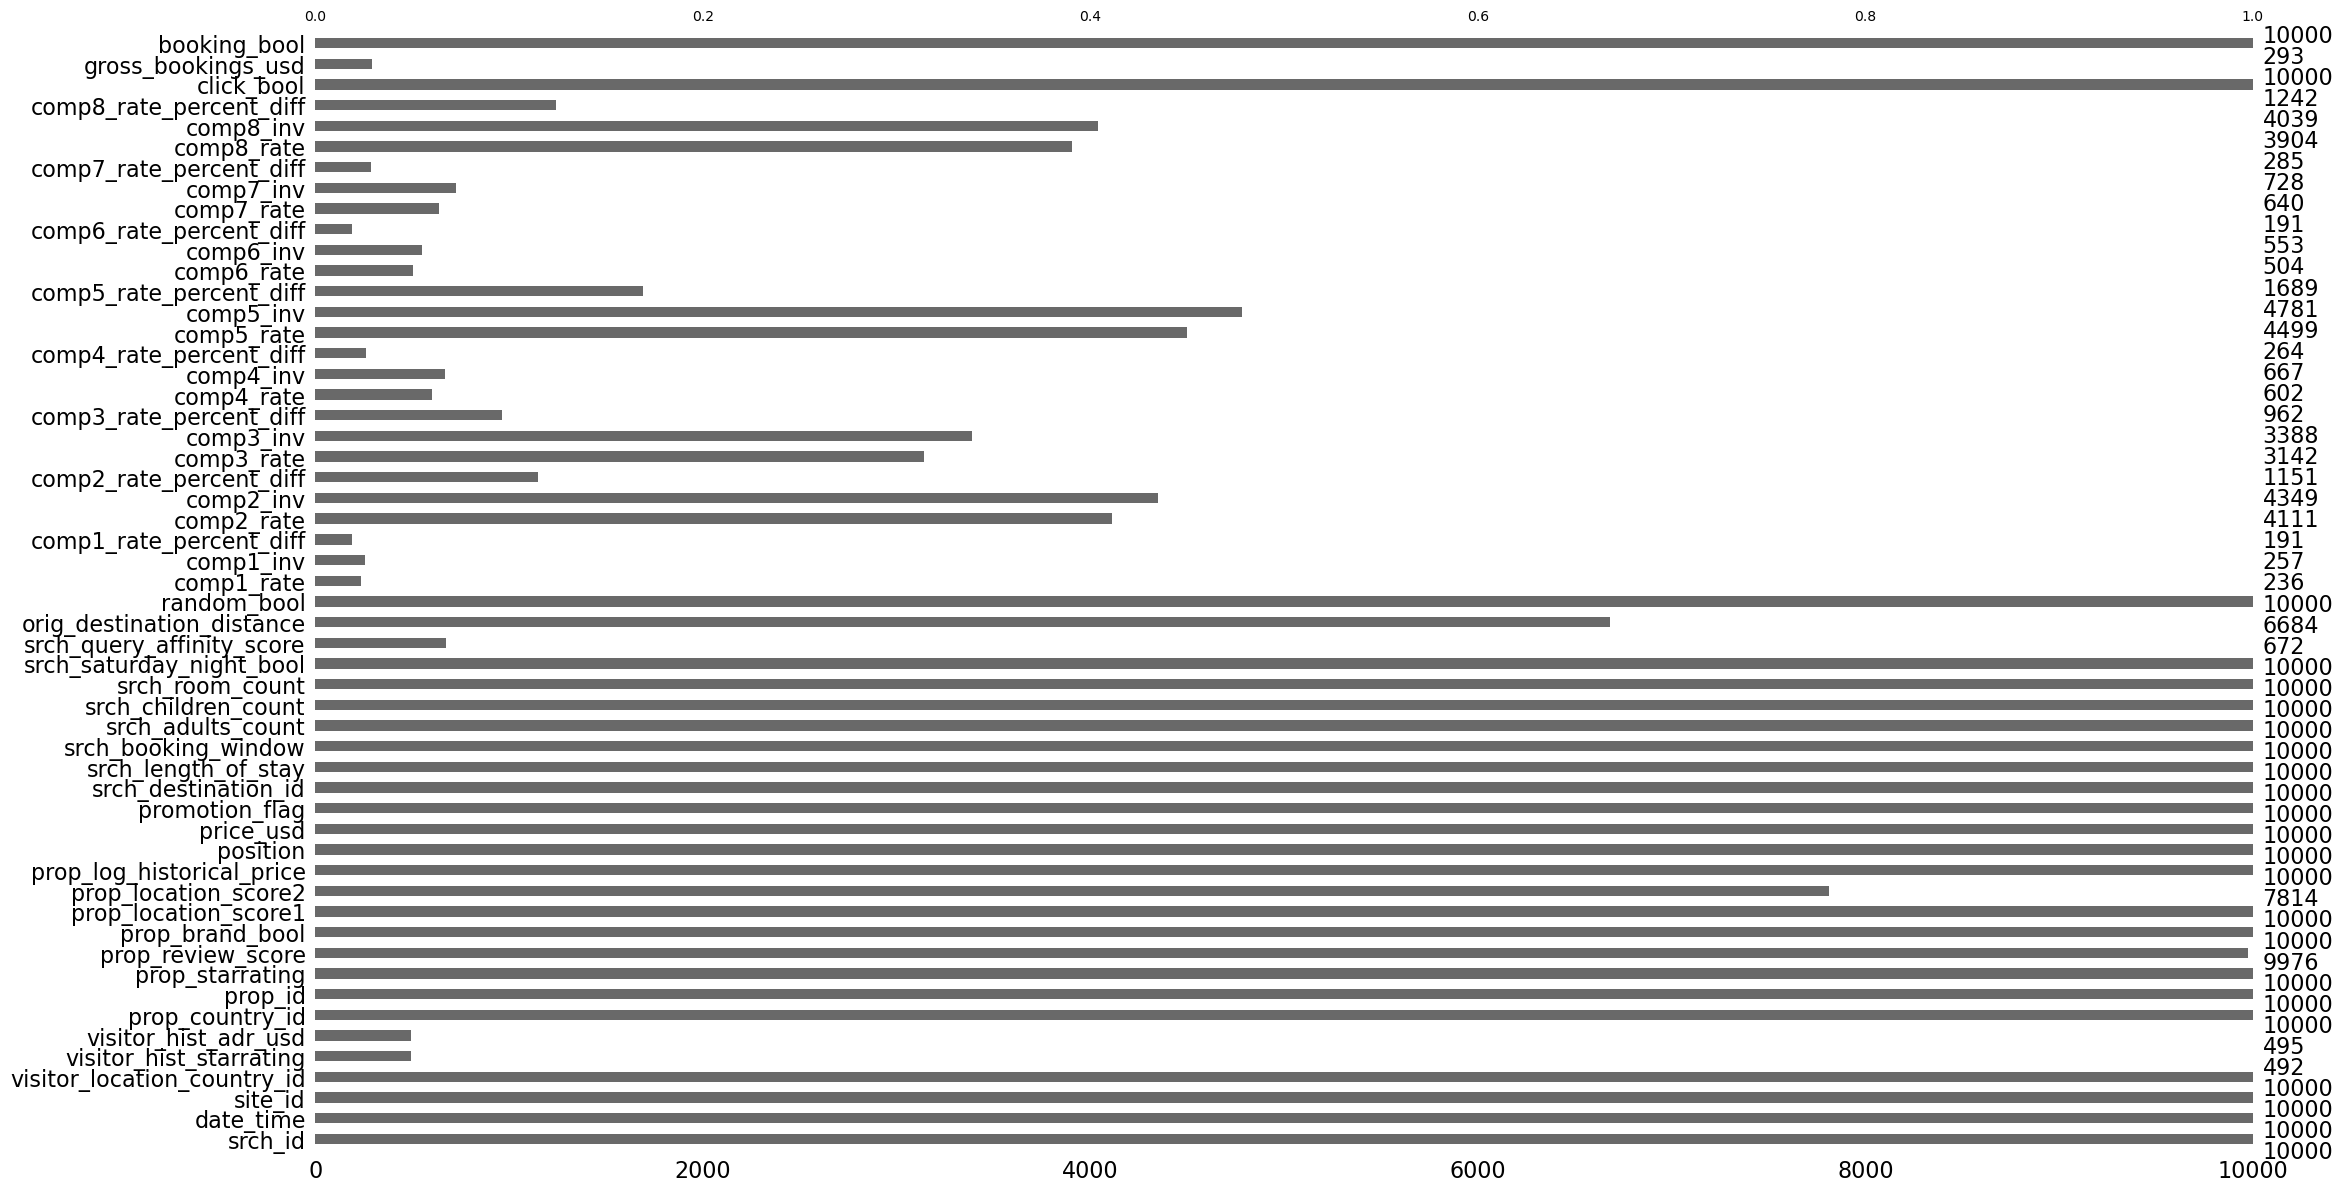

In [8]:
import missingno as msno
# visualize the missing values
msno.bar(df)

In [9]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,10000.000000,10000.000000,10000.000000,492.000000,495.000000,10000.000000,10000.000000,10000.000000,9976.000000,10000.000000,10000.000000,7814.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,672.000000,6684.000000,10000.000000,236.000000,257.000000,191.00000,4111.000000,4349.000000,1151.000000,3142.000000,3388.000000,962.000000,602.000000,667.000000,264.000000,4499.000000,4781.00000,1689.000000,504.000000,553.000000,191.000000,640.000000,728.000000,285.000000,3904.000000,4039.000000,1242.000000,10000.000000,293.000000,10000.000000
mean,166389.441000,9.961600,175.315200,3.350813,173.642828,173.657400,70243.020900,3.174200,3.762881,0.640500,2.867027,0.128503,4.32458,16.790700,204.389284,0.218300,14032.631700,2.376500,37.187000,1.984100,0.362100,1.114300,0.507900,-24.746899,1321.113561,0.287900,0.504237,0.035019,304.26178,0.036244,0.043228,18.832320,-0.000955,0.056966,16.625780,-0.013289,0.098951,1892.803030,0.019115,0.04999,18.163410,0.091270,0.088608,15.816754,0.157812,0.096154,19.905263,-0.060707,0.008913,14.891304,0.047200,393.935904,0.029300
std,96186.254878,7.604387,65.868933,0.717366,126.711234,68.548667,40671.616507,1.061681,1.075256,0.479878,1.543744,0.158581,1.83331,10.467409,3036.587172,0.413113,8142.841748,2.042343,51.199472,0.866442,0.743262,0.407249,0.499963,19.264683,2033.939350,0.452807,0.642455,0.239505,1252.05460,0.450898,0.248210,33.730655,0.453855,0.298607,20.755885,0.602123,0.318285,17533.841983,0.525549,0.25997,18.452207,0.549356,0.320377,16.652262,0.590828,0.317463,37.364612,0.467387,0.198857,16.816839,0.212077,863.771786,0.168655
min,45.000000,1.000000,1.000000,1.410000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.090000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-313.674100,0.050000,0.000000,-1.000000,-1.000000,2.00000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.00000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000,13.540000,0.000000
25%,82173.750000,5.000000,100.000000,2.830000,107.910000,100.000000,35185.750000,3.000000,3.500000,0.000000,1.790000,0.018800,4.44000,8.000000,85.000000,0.000000,7224.000000,1.000000,4.000000,2.000000,0.000000,1.000000,0.000000,-30.885950,146.247500,0.000000,0.000000,0.000000,6.00000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,0.00000,7.000000,0.000000,0.000000,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,122.960000,0.000000
50%,166948.000000,5.000000,219.000000,3.380000,146.050000,219.000000,69675.500000,3.000000,4.000000,1.000000,2.770000,0.066800,4.92000,16.000000,122.000000,0.000000,13545.000000,2.000000,17.000000,2.000000,0.000000,1.000000,1.000000,-20.747450,393.385000,0.000000,1.000000,0.000000,10.00000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,0.000000,0.00000,12.000000,0.000000,0.000000,11.000000,0.000000,0.00

In [10]:
# Check the distribution of the booking_bool variable
df['booking_bool'].value_counts()

0    9707
1     293
Name: booking_bool, dtype: int64

In [11]:
# Check the distribution of the click_bool variable
df['click_bool'].value_counts()

0    9528
1     472
Name: click_bool, dtype: int64

In [12]:
# Check the distribution of the visitor_location_country_id 
print(df['visitor_location_country_id'].value_counts().head())

219    5811
100    1020
55      615
216     478
220     333
Name: visitor_location_country_id, dtype: int64


In [13]:
# Check the distribution of the visitor_hist_starrating 
print(df['visitor_hist_starrating'].value_counts())


3.00    42
4.00    41
3.50    29
2.50    23
2.00    18
        ..
4.20     1
3.84     1
2.07     1
3.22     1
3.61     1
Name: visitor_hist_starrating, Length: 168, dtype: int64


In [14]:
# average visitor_hist_starrating for each srch_id.
df.groupby('srch_id')['visitor_hist_starrating'].mean().dropna()
# df.groupby('srch_id')['visitor_hist_starrating'].mean()

srch_id
766       3.00
836       2.94
3110      4.00
3214      3.49
3655      3.15
          ... 
330916    3.67
331490    2.75
331534    4.27
331694    3.71
332127    3.33
Name: visitor_hist_starrating, Length: 471, dtype: float64

Text(0, 0.5, 'Price')

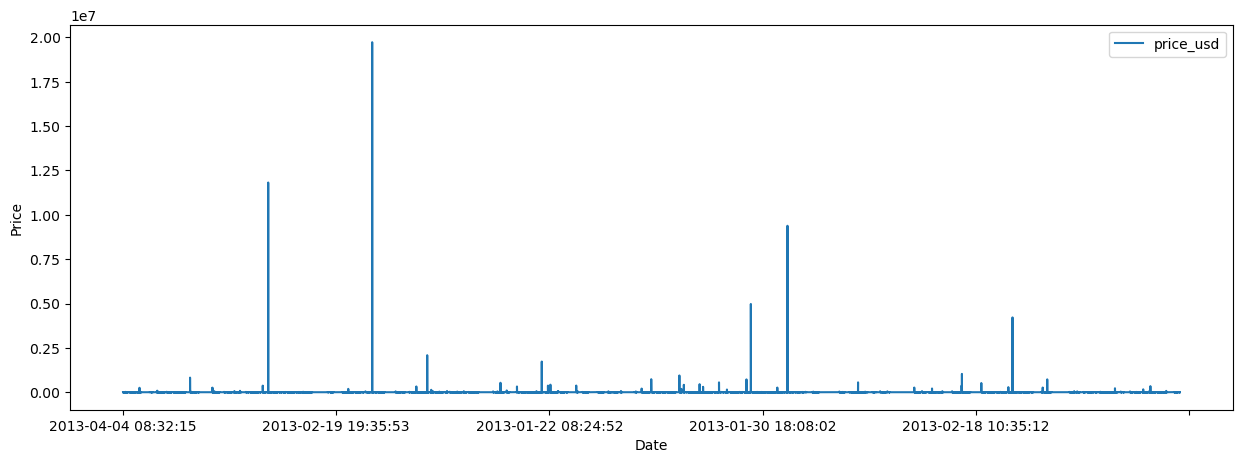

In [15]:
df_original.plot(x='date_time',y='price_usd',figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Price')
# plt.title("Time Series Graph Of Price Of Room Based on Date-Time")